# Programming Assignment : SVM
In this programming assignment, you would use Support Vector Machines and Logistic Regression
for classification problem. We are using Logistic Regression to compare performance of both the algorithms on the same dataset with different values of parameters like type of kernel used, type of regularization techniques used (ridge/lasso) etc.

Do the assignment carefully, by understanding the structure of the code.

# Instructions :
You have to write a small report in a pdf file. You can use bullet points to discuss your results for every function of the assignment.<br>
For example, for data1.csv dataset, write which method gave you the best accuracy using which value of the parameter.<br>
Do not write explainations, just discuss your results / observations point to point. 


In [171]:
# Importing the libraries to be used:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline 

# Importing the dataset:
The dataset we are using for this assignment is taken from UCI Machine Learning Repository. The dataset consists of Attributes/Factors that contribute to prediction of Diabetic Retinopathy(DR) in a diabetic patient. Given some predictors, we need to predict the value of target variable i.e. DR or Non-DR case. The dataset is given in the file data1.csv  

In [172]:
# Read the file into a pandas data frame.
df = pd.read_csv("data1.csv")

In [173]:
# There can be some columns which may have missing values. So, we are removing those columns from our dataset.
df1 = df.dropna(axis = 1)

In [174]:
# Converting the df1 data frame into a numpy array named df2. Use values method of dataframes.
df2 = df1.values
print(df2.shape)

(1151, 20)


In [175]:
# Select all rows and first 19 columns as X from df2.
X = df2[:, :19]
# Select all rows and last column as Y from df2.
Y = df2[:, -1]

In [176]:
# Splitting the dataset into training and test data.
# Select first 600 rows as training dataset and the remaining rows as test dataset.
X_train = X[:600]
Y_train = Y[:600]
X_test = X[600:]
Y_test = Y[600:]

# Logistic Regression
First we will fit the dataset using a logistic regression model.

# Logistic Regression with Lasso(L1) Regularization.
Read the comments in the below cell carefully.
Try different values of parameter C.

In [177]:
# Initialize an empty list to store values of training set accuracy.
acc_train_logreg = [] 

In [178]:
# Initialize an empty list to store values of test set accuracy.
acc_test_logreg = []

In [179]:
# Initialize an empty list to store different values of parameter 'c'.
c_logreg = []

In [180]:
# Complete the function logreg that accepts 'c' as a parameter, which is used to create logreg model 
# with different values of C.
def logreg_model(c , X_train, Y_train, X_test, Y_test):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of penalty as 'L1'. By default, it is 'L2'.
    # Pass the value of C = c. Note that C is the inverse of lambda. So, small value of C i.e. b/w 0 and 1 
    # means stronger regularization and large value means less regularization.
    # Also, in sklearn, L1 is only supported with solver = 'saga'. Solver is the type of optimization algorithm like GDA or
    # SGDA, which is to be used. So, 'saga' is another algorithm like that. Pass the value of solver as 'saga'

    logreg = linear_model.LogisticRegression(penalty="L1", C=c, solver="saga")
    
    # Fit the model on the training set.
    logreg.fit(X_train, Y_train)
    
    # Find the prediction on training set.
    Yhat_train = yhat = logreg.predict(X_train)
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    # Find the prediction on test set.
    Yhat_test = yhat = logreg.predict(X_test)
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    c_logreg.append(c)

# Logistic Regression with Ridge(L2) Regularization.

Accuracy on training data = 0.618333
Accuracy on test data = 0.602541
Accuracy on training data = 0.718333
Accuracy on test data = 0.653358
Accuracy on training data = 0.726667
Accuracy on test data = 0.673321
Accuracy on training data = 0.723333
Accuracy on test data = 0.680581
Accuracy on training data = 0.723333
Accuracy on test data = 0.680581
Accuracy on training data = 0.723333
Accuracy on test data = 0.680581


/Users/sophia.danielsen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.723333
Accuracy on test data = 0.680581


Text(0,0.5,'test accuracy')

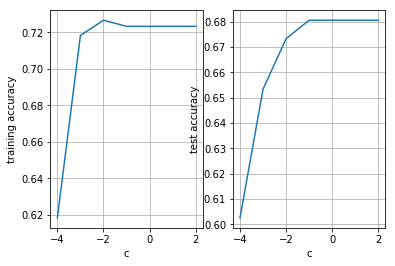

In [181]:
# Call the above function i.e. logreg_model with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
c = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

for val in c:
    logreg_model(val , X_train, Y_train, X_test, Y_test)
    
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.subplot(1, 2, 1)
plt.plot(np.log10(c_logreg),acc_train_logreg)
plt.grid()
plt.xlabel('c')
plt.ylabel('training accuracy')

plt.subplot(1, 2, 2)
plt.plot(np.log10(c_logreg),acc_test_logreg)
plt.grid()
plt.xlabel('c')
plt.ylabel('test accuracy')

In [182]:
# Initialize an empty list to store values of training set accuracy.
acc_train_logreg2 = []

In [183]:
# Initialize an empty list to store values of test set accuracy.
acc_test_logreg2 = []

In [184]:
# Initialize an empty list to store different values of parameter 'c'.
c_logreg2 = []

In [185]:
def logreg2_model(c , X_train, Y_train, X_test, Y_test):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of C=c.
    # You need not pass other parameters as penalty is 'L2' by default.
    
    logreg2 =linear_model.LogisticRegression(C=c)
    
    # Fit the model on the training set.
    logreg2.fit(X_train, Y_train)
    
    # Find the prediction on training set.
    Yhat_train = logreg2.predict(X_train)
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg2.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    # Find the prediction and accuracy on test set.
    Yhat_test = logreg2.predict(X_test)
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg2.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    c_logreg2.append(c)
    

Accuracy on training data = 0.616667
Accuracy on test data = 0.604356
Accuracy on training data = 0.718333
Accuracy on test data = 0.658802
Accuracy on training data = 0.733333
Accuracy on test data = 0.725953
Accuracy on training data = 0.741667
Accuracy on test data = 0.744102
Accuracy on training data = 0.748333
Accuracy on test data = 0.751361
Accuracy on training data = 0.741667
Accuracy on test data = 0.753176
Accuracy on training data = 0.741667
Accuracy on test data = 0.756806


Text(0,0.5,'test accuracy')

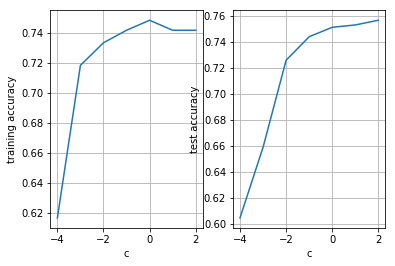

In [186]:
# Call the above function i.e. logreg2_model with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100

for val in c:
    logreg2_model(val , X_train, Y_train, X_test, Y_test)
    
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.subplot(1, 2, 1)
plt.plot(np.log10(c_logreg2),acc_train_logreg2)
plt.grid()
plt.xlabel('c')
plt.ylabel('training accuracy')

plt.subplot(1, 2, 2)
plt.plot(np.log10(c_logreg2),acc_test_logreg2)
plt.grid()
plt.xlabel('c')
plt.ylabel('test accuracy')

# Logistic Regression Using Polynomial Feature Transformation
Refer the given link to know how we can transform features.<br>
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [187]:
from sklearn.preprocessing import PolynomialFeatures

In [188]:
# Create an object of PolynomialFeatures(2):
poly = PolynomialFeatures(2)

In [189]:
# Create the transformed data matrices for training and test using poly.fit_transform(..)
X_transformed_train = poly.fit_transform(X_train, Y_train)
X_transformed_test = poly.fit_transform(X_test, Y_test)

In [190]:
# Check the shapes of the new matrices.
# Originally, we had 19 features.
X_transformed_train.shape
X_transformed_test.shape

(551, 210)

/Users/sophia.danielsen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.691667
Accuracy on test data = 0.646098
Accuracy on training data = 0.691667
Accuracy on test data = 0.646098
Accuracy on training data = 0.693333
Accuracy on test data = 0.646098
Accuracy on training data = 0.693333
Accuracy on test data = 0.646098
Accuracy on training data = 0.693333
Accuracy on test data = 0.646098
Accuracy on training data = 0.695000
Accuracy on test data = 0.646098
Accuracy on training data = 0.691667
Accuracy on test data = 0.646098


Text(0,0.5,'test accuracy')

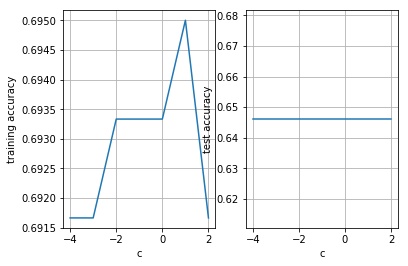

In [191]:
# Calling the logreg_model(..) using transformed features.
# Pass c, X_transformed_train , Y_train, X_transformed_test, Y_test
# Before calling the function, we need to re-initialize the 3 lists in which we append the 
# results (accuracy) because these lists are global variables.

acc_train_logreg = []
acc_test_logreg = []
c_logreg = []

# Call the function logreg_model.
for val in c:
    logreg_model(val , X_transformed_train, Y_train, X_transformed_test, Y_test)
    
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.subplot(1, 2, 1)
plt.plot(np.log10(c_logreg),acc_train_logreg)
plt.grid()
plt.xlabel('c')
plt.ylabel('training accuracy')

plt.subplot(1, 2, 2)
plt.plot(np.log10(c_logreg),acc_test_logreg)
plt.grid()
plt.xlabel('c')
plt.ylabel('test accuracy')

Accuracy on training data = 0.768333
Accuracy on test data = 0.745917
Accuracy on training data = 0.790000
Accuracy on test data = 0.735027
Accuracy on training data = 0.813333
Accuracy on test data = 0.742287
Accuracy on training data = 0.830000
Accuracy on test data = 0.727768
Accuracy on training data = 0.828333
Accuracy on test data = 0.720508
Accuracy on training data = 0.840000
Accuracy on test data = 0.709619
Accuracy on training data = 0.831667
Accuracy on test data = 0.724138


Text(0,0.5,'test accuracy')

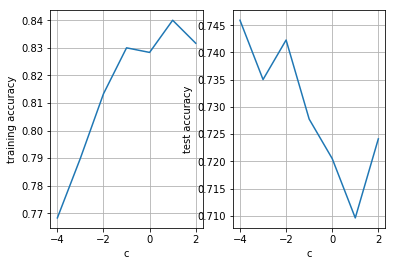

In [192]:
# Calling the logreg2_model(..) using transformed features.
# Pass c, X_transformed_train , Y_train, X_transformed_test, Y_test
# Before calling the function, we need to re-initialize the 3 lists in which we append the 
# results (accuracy) beacause these list are global varibles.
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []
# Call the function logreg2_model.
for val in c:
    logreg2_model(val , X_transformed_train, Y_train, X_transformed_test, Y_test)
    
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.subplot(1, 2, 1)
plt.plot(np.log10(c_logreg2),acc_train_logreg2)
plt.grid()
plt.xlabel('c')
plt.ylabel('training accuracy')

plt.subplot(1, 2, 2)
plt.plot(np.log10(c_logreg2),acc_test_logreg2)
plt.grid()
plt.xlabel('c')
plt.ylabel('test accuracy')

# Note:
<u>Do not</u> use these transformed features for the further part of the assignment. Use the X_train, Y_train, X_test and Y_test matrices.

# Support Vector Machines (SVM)
Now we will use the same dataset and try to find a classifier using SVM.
For more information about svm classifier, check the given link.
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# SVM using Linear Kernel.

In [193]:
acc_train_svm_linear = []

In [194]:
acc_test_svm_linear = []

In [195]:
c_svm_linear = []

In [196]:
# Complete the function below:
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_linear(c):
    # Create an object of svm.SVC(probability = False, kernel = 'linear', C = c).
    svc = svm.SVC(probability = False, kernel = 'linear', C = c)
    
    # Fit the classifier on the training set.
    svc.fit(X_train, Y_train)
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_linear_train = svc.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    acc_train_svm_linear.append(acc_train)
    print('Accuracy Training = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_linear_test = svc.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    acc_test_svm_linear.append(acc_test)
    print('Accuracy Test = {0:f}'.format(acc_test))
    
    c_svm_linear.append(c)
    

Accuracy Training = 0.681667
Accuracy Test = 0.635209
Accuracy Training = 0.718333
Accuracy Test = 0.689655
Accuracy Training = 0.720000
Accuracy Test = 0.747731
Accuracy Training = 0.741667
Accuracy Test = 0.756806
Accuracy Training = 0.738333
Accuracy Test = 0.745917
Accuracy Training = 0.743333
Accuracy Test = 0.744102


Text(0,0.5,'test accuracy')

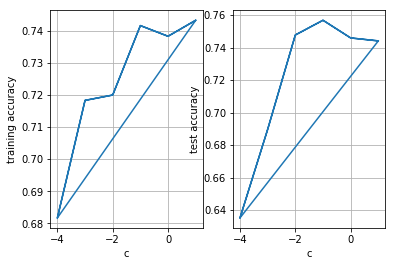

In [200]:
# Call the above function i.e. svm_linear with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
c = [0.0001, 0.001, 0.01, 0.1, 1, 10]

for val in c:
    svm_linear(val)
    
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.subplot(1, 2, 1)
plt.plot(np.log10(c_svm_linear),acc_train_svm_linear)
plt.grid()
plt.xlabel('c')
plt.ylabel('training accuracy')

plt.subplot(1, 2, 2)
plt.plot(np.log10(c_svm_linear),acc_test_svm_linear)
plt.grid()
plt.xlabel('c')
plt.ylabel('test accuracy')

Change the value of parameter C above and see the difference in the results.

# SVM using Radial Basis Function(RBF) Kernel.

In [201]:
# Complete the function below.
# g is the value of gamma. 
def svm_rbf(c, g):
    # Create an object of svm classifier using svm.SVC()
    # Pass probability = False, kernel = 'rbf', value of C = c and rbf paramter gamma = g.
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c, gamma = g)
    
    # Fit the classifier on the training set.
    svc_rbf.fit(X_train, Y_train)
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_rbf_train = svc_rbf.predict(X_train)
    acc = np.mean(Yhat_svc_rbf_train == Y_train)
    print('Accuracy Training = {0:f}'.format(acc))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    acc = np.mean(Yhat_svc_rbf_test == Y_test)
    print('Accuracy Test= {0:f}'.format(acc))
  

In [202]:
# Call the above function i.e. svm_rbf with different values of parameter 'c' and 'g'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
for val in c:
    svm_rbf(val, 0.001)

Accuracy Training = 0.543333
Accuracy Test= 0.517241
Accuracy Training = 0.543333
Accuracy Test= 0.517241
Accuracy Training = 0.543333
Accuracy Test= 0.517241
Accuracy Training = 0.685000
Accuracy Test= 0.642468
Accuracy Training = 0.761667
Accuracy Test= 0.669691
Accuracy Training = 0.846667
Accuracy Test= 0.678766


Change the value of parameter C and gamma above and see the difference in the results. 

# SVM using Polynomial Kernel.
Note: SVM with polynomial kernel can be sometimes very slow. If that is the case, use smaller size of training set. Instead of all 600 training examples, use less (say 300).

In [95]:
acc_train_svm_poly = []

In [96]:
acc_test_svm_poly = []

In [97]:
c_svm_poly = []

In [98]:
def svm_polynomial(c):
    # Create an object of svm classifier using svm.SVC()
    # Pass probability = False, kernel = 'poly' , value of C = c.
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly' , C = c)
    
    A = X_train[0:300,:]  # First 300 rows of training set.
    B = Y_train[0:300]  
    C = X_test[0:100,:]   # First 100 rows of test set.
    D = Y_test[0:100]
    
    # Fit the classifier on the training set.
    # Use A and B to train and C and D to test.
    svc_polynomial.fit(A, B)
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_polynomial_train = svc_polynomial.predict(A)
    acc_train = np.mean(Yhat_svc_polynomial_train == B)
    acc_train_svm_poly.append(acc_train)
    print('Accuracy Training = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_polynomial_test = svc_polynomial.predict(C)
    acc_test = np.mean(Yhat_svc_polynomial_test == D)
    acc_test_svm_poly.append(acc_test)
    print('Accuracy Test = {0:f}'.format(acc_test))
    
    c_svm_poly.append(c)
    

In [65]:
# Call the above function i.e. svm_poly with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
for val in c:
    svm_polynomial(val)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.subplot(1, 2, 1)
plt.plot(np.log10(c_svm_poly),acc_train_svm_poly)
plt.grid()
plt.xlabel('c')
plt.ylabel('training accuracy')

plt.subplot(1, 2, 2)
plt.plot(np.log10(c_svm_poly),acc_test_svm_poly)
plt.grid()
plt.xlabel('c')
plt.ylabel('test accuracy')

Accuracy Training = 0.840000
Accuracy Test = 0.690000
Accuracy Training = 0.873333
Accuracy Test = 0.640000
Accuracy Training = 0.913333
Accuracy Test = 0.690000


KeyboardInterrupt: 

Change the value of parameter C and see the difference in the results.

# Repeating the Assignment with 2 more Datasets:
1) Cryotherapy.csv (Predict result of treatment using 6 predictors).
https://archive.ics.uci.edu/ml/datasets/Cryotherapy+Dataset+<br>
2) Immunotherapy.csv (Predict result of treatment using 7 predictors).
https://archive.ics.uci.edu/ml/datasets/Immunotherapy+Dataset <br>
You have to repeat the full assignment with 2 more different datasets. You have to write a small report in a pdf file. You can use bullet points to discuss your results for every function of the assignment.<br>
For example, for data1.csv dataset, write which method gave you the best accuracy using which value of the parameter.<br>
You have to write this for all the 3 datasets in a single pdf file. 
Do not write explainations, just discuss your results / observations point to point. 

In [151]:
# Read the file into a pandas data frame.
df = pd.read_csv("Cryotherapy.csv")

# There can be some columns which may have missing values. So, we are removing those columns from our dataset.
df1 = df.dropna(axis = 1)

# Converting the df1 data frame into a numpy array named df2. Use values method of dataframes.
df2 = df1.values

print(df2.shape) 

# Select all rows and first 19 columns as X from df2.
X = df2[:, :6]
# Select all rows and last column as Y from df2.
Y = df2[:, -1]

# Splitting the dataset into training and test data.
# Select first 600 rows as training dataset and the remaining rows as test dataset.
X_train = X[:40]
Y_train = Y[:40]
X_test = X[40:]
Y_test = Y[40:]

(90, 7)


Accuracy on training data = 0.525000
Accuracy on test data = 0.420000
Accuracy on training data = 0.525000
Accuracy on test data = 0.420000
Accuracy on training data = 0.525000
Accuracy on test data = 0.420000
Accuracy on training data = 0.525000
Accuracy on test data = 0.420000
Accuracy on training data = 0.525000
Accuracy on test data = 0.420000
Accuracy on training data = 0.525000
Accuracy on test data = 0.420000


/Users/sophia.danielsen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Text(0,0.5,'test accuracy')

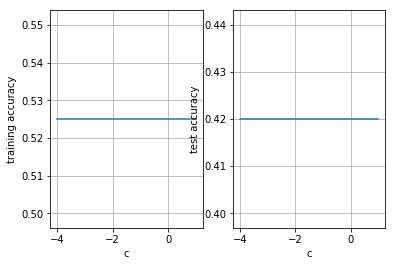

In [152]:
c = [0.0001, 0.001, 0.01, 0.1, 1, 10]

# Initialize an empty list to store values of training set accuracy.
acc_train_logreg = [] 

# Initialize an empty list to store values of test set accuracy.
acc_test_logreg = []

# Initialize an empty list to store different values of parameter 'c'.
c_logreg = []

for val in c:
    logreg_model(val , X_train, Y_train, X_test, Y_test)
    
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.subplot(1, 2, 1)
plt.plot(np.log10(c_logreg),acc_train_logreg)
plt.grid()
plt.xlabel('c')
plt.ylabel('training accuracy')

plt.subplot(1, 2, 2)
plt.plot(np.log10(c_logreg),acc_test_logreg)
plt.grid()
plt.xlabel('c')
plt.ylabel('test accuracy')

Accuracy on training data = 0.525000
Accuracy on test data = 0.420000
Accuracy on training data = 0.525000
Accuracy on test data = 0.420000
Accuracy on training data = 0.575000
Accuracy on test data = 0.640000
Accuracy on training data = 0.750000
Accuracy on test data = 0.800000
Accuracy on training data = 0.875000
Accuracy on test data = 0.800000
Accuracy on training data = 0.900000
Accuracy on test data = 0.860000


Text(0,0.5,'test accuracy')

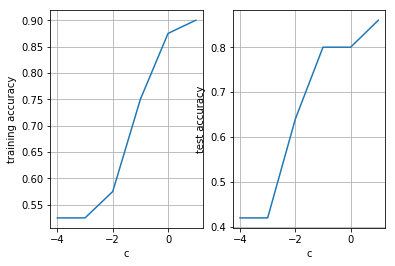

In [153]:
# Initialize an empty list to store values of training set accuracy.
acc_train_logreg2 = []

# Initialize an empty list to store values of test set accuracy.
acc_test_logreg2 = []

# Initialize an empty list to store different values of parameter 'c'.
c_logreg2 = []

for val in c:
    logreg2_model(val , X_train, Y_train, X_test, Y_test)
    
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.subplot(1, 2, 1)
plt.plot(np.log10(c_logreg2),acc_train_logreg2)
plt.grid()
plt.xlabel('c')
plt.ylabel('training accuracy')

plt.subplot(1, 2, 2)
plt.plot(np.log10(c_logreg2),acc_test_logreg2)
plt.grid()
plt.xlabel('c')
plt.ylabel('test accuracy')

In [154]:
# Create the transformed data matrices for training and test using poly.fit_transform(..)
X_transformed_train = poly.fit_transform(X_train, Y_train)
X_transformed_test = poly.fit_transform(X_test, Y_test)

/Users/sophia.danielsen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.525000
Accuracy on test data = 0.420000
Accuracy on training data = 0.525000
Accuracy on test data = 0.420000
Accuracy on training data = 0.525000
Accuracy on test data = 0.420000
Accuracy on training data = 0.525000
Accuracy on test data = 0.420000
Accuracy on training data = 0.525000
Accuracy on test data = 0.420000
Accuracy on training data = 0.525000
Accuracy on test data = 0.420000


Text(0,0.5,'test accuracy')

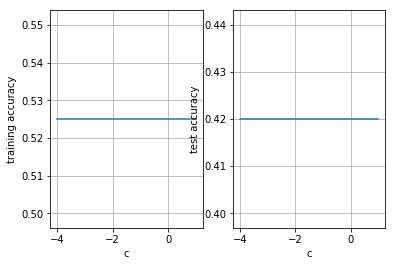

In [155]:
# Initialize an empty list to store values of training set accuracy.
acc_train_logreg = [] 

# Initialize an empty list to store values of test set accuracy.
acc_test_logreg = []

# Initialize an empty list to store different values of parameter 'c'.
c_logreg = []

for val in c:
    logreg_model(val , X_transformed_train, Y_train, X_transformed_test, Y_test)
    
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.subplot(1, 2, 1)
plt.plot(np.log10(c_logreg),acc_train_logreg)
plt.grid()
plt.xlabel('c')
plt.ylabel('training accuracy')

plt.subplot(1, 2, 2)
plt.plot(np.log10(c_logreg),acc_test_logreg)
plt.grid()
plt.xlabel('c')
plt.ylabel('test accuracy')

Accuracy on training data = 0.900000
Accuracy on test data = 0.760000
Accuracy on training data = 0.950000
Accuracy on test data = 0.800000
Accuracy on training data = 1.000000
Accuracy on test data = 0.780000
Accuracy on training data = 1.000000
Accuracy on test data = 0.780000
Accuracy on training data = 1.000000
Accuracy on test data = 0.760000
Accuracy on training data = 1.000000
Accuracy on test data = 0.760000


Text(0,0.5,'test accuracy')

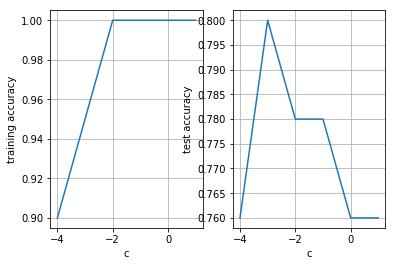

In [156]:
# Initialize an empty list to store values of training set accuracy.
acc_train_logreg2 = []

# Initialize an empty list to store values of test set accuracy.
acc_test_logreg2 = []

# Initialize an empty list to store different values of parameter 'c'.
c_logreg2 = []

for val in c:
    logreg2_model(val , X_transformed_train, Y_train, X_transformed_test, Y_test)
    
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.subplot(1, 2, 1)
plt.plot(np.log10(c_logreg2),acc_train_logreg2)
plt.grid()
plt.xlabel('c')
plt.ylabel('training accuracy')

plt.subplot(1, 2, 2)
plt.plot(np.log10(c_logreg2),acc_test_logreg2)
plt.grid()
plt.xlabel('c')
plt.ylabel('test accuracy')

Accuracy Training = 0.650000
Accuracy Test = 0.680000
Accuracy Training = 0.800000
Accuracy Test = 0.800000
Accuracy Training = 0.875000
Accuracy Test = 0.880000
Accuracy Training = 0.850000
Accuracy Test = 0.880000
Accuracy Training = 0.950000
Accuracy Test = 0.860000
Accuracy Training = 0.950000
Accuracy Test = 0.860000


Text(0,0.5,'test accuracy')

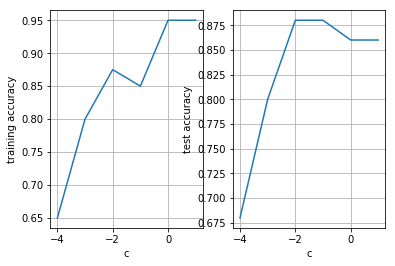

In [157]:
acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []

for val in c:
    svm_linear(val)
    
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.subplot(1, 2, 1)
plt.plot(np.log10(c_svm_linear),acc_train_svm_linear)
plt.grid()
plt.xlabel('c')
plt.ylabel('training accuracy')

plt.subplot(1, 2, 2)
plt.plot(np.log10(c_svm_linear),acc_test_svm_linear)
plt.grid()
plt.xlabel('c')
plt.ylabel('test accuracy')

In [169]:
# Call the above function i.e. svm_rbf with different values of parameter 'c' and 'g'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
for val in c:
    svm_rbf(val, 0.001)

Accuracy Training = 0.525000
Accuracy Test= 0.420000
Accuracy Training = 0.525000
Accuracy Test= 0.420000
Accuracy Training = 0.525000
Accuracy Test= 0.420000
Accuracy Training = 0.525000
Accuracy Test= 0.420000
Accuracy Training = 0.750000
Accuracy Test= 0.700000
Accuracy Training = 0.975000
Accuracy Test= 0.880000


Accuracy Training = 0.975000
Accuracy Test = 0.760000
Accuracy Training = 1.000000
Accuracy Test = 0.740000
Accuracy Training = 1.000000
Accuracy Test = 0.740000
Accuracy Training = 1.000000
Accuracy Test = 0.740000
Accuracy Training = 1.000000
Accuracy Test = 0.740000
Accuracy Training = 1.000000
Accuracy Test = 0.740000


Text(0,0.5,'test accuracy')

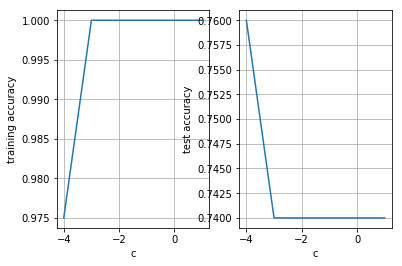

In [170]:
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []

for val in c:
    svm_polynomial(val)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.subplot(1, 2, 1)
plt.plot(np.log10(c_svm_poly),acc_train_svm_poly)
plt.grid()
plt.xlabel('c')
plt.ylabel('training accuracy')

plt.subplot(1, 2, 2)
plt.plot(np.log10(c_svm_poly),acc_test_svm_poly)
plt.grid()
plt.xlabel('c')
plt.ylabel('test accuracy')

In [204]:
# Read the file into a pandas data frame.
df = pd.read_csv("Immunotherapy.csv")

# There can be some columns which may have missing values. So, we are removing those columns from our dataset.
df1 = df.dropna(axis = 1)

# Converting the df1 data frame into a numpy array named df2. Use values method of dataframes.
df2 = df1.values

print(df2.shape) 

# Select all rows and first 19 columns as X from df2.
X = df2[:, :7]
# Select all rows and last column as Y from df2.
Y = df2[:, -1]

# Splitting the dataset into training and test data.
# Select first 600 rows as training dataset and the remaining rows as test dataset.
X_train = X[:40]
Y_train = Y[:40]
X_test = X[40:]
Y_test = Y[40:]

(90, 8)


Accuracy on training data = 0.800000
Accuracy on test data = 0.780000
Accuracy on training data = 0.800000
Accuracy on test data = 0.780000
Accuracy on training data = 0.800000
Accuracy on test data = 0.780000
Accuracy on training data = 0.800000
Accuracy on test data = 0.780000
Accuracy on training data = 0.800000
Accuracy on test data = 0.780000
Accuracy on training data = 0.800000
Accuracy on test data = 0.780000


/Users/sophia.danielsen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Text(0,0.5,'test accuracy')

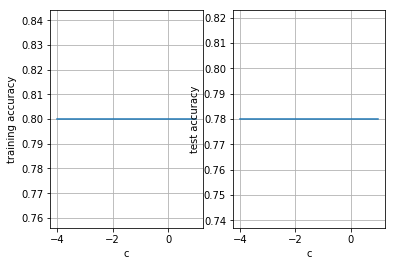

In [205]:
c = [0.0001, 0.001, 0.01, 0.1, 1, 10]

# Initialize an empty list to store values of training set accuracy.
acc_train_logreg = [] 

# Initialize an empty list to store values of test set accuracy.
acc_test_logreg = []

# Initialize an empty list to store different values of parameter 'c'.
c_logreg = []

for val in c:
    logreg_model(val , X_train, Y_train, X_test, Y_test)
    
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.subplot(1, 2, 1)
plt.plot(np.log10(c_logreg),acc_train_logreg)
plt.grid()
plt.xlabel('c')
plt.ylabel('training accuracy')

plt.subplot(1, 2, 2)
plt.plot(np.log10(c_logreg),acc_test_logreg)
plt.grid()
plt.xlabel('c')
plt.ylabel('test accuracy')

Accuracy on training data = 0.800000
Accuracy on test data = 0.780000
Accuracy on training data = 0.800000
Accuracy on test data = 0.780000
Accuracy on training data = 0.750000
Accuracy on test data = 0.760000
Accuracy on training data = 0.800000
Accuracy on test data = 0.720000
Accuracy on training data = 0.825000
Accuracy on test data = 0.760000
Accuracy on training data = 0.900000
Accuracy on test data = 0.700000


Text(0,0.5,'test accuracy')

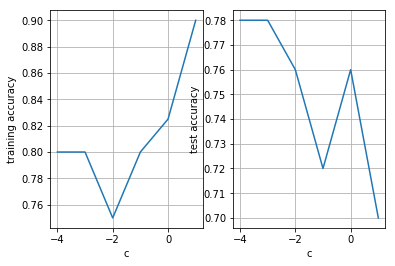

In [206]:
# Initialize an empty list to store values of training set accuracy.
acc_train_logreg2 = []

# Initialize an empty list to store values of test set accuracy.
acc_test_logreg2 = []

# Initialize an empty list to store different values of parameter 'c'.
c_logreg2 = []

for val in c:
    logreg2_model(val , X_train, Y_train, X_test, Y_test)
    
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.subplot(1, 2, 1)
plt.plot(np.log10(c_logreg2),acc_train_logreg2)
plt.grid()
plt.xlabel('c')
plt.ylabel('training accuracy')

plt.subplot(1, 2, 2)
plt.plot(np.log10(c_logreg2),acc_test_logreg2)
plt.grid()
plt.xlabel('c')
plt.ylabel('test accuracy')

In [207]:
# Create the transformed data matrices for training and test using poly.fit_transform(..)
X_transformed_train = poly.fit_transform(X_train, Y_train)
X_transformed_test = poly.fit_transform(X_test, Y_test)

Accuracy on training data = 0.800000
Accuracy on test data = 0.780000
Accuracy on training data = 0.800000
Accuracy on test data = 0.780000
Accuracy on training data = 0.800000
Accuracy on test data = 0.780000
Accuracy on training data = 0.800000
Accuracy on test data = 0.780000
Accuracy on training data = 0.800000
Accuracy on test data = 0.780000
Accuracy on training data = 0.800000
Accuracy on test data = 0.780000


/Users/sophia.danielsen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Text(0,0.5,'test accuracy')

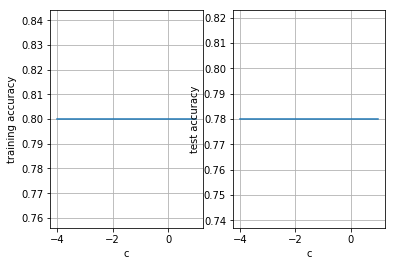

In [208]:
# Initialize an empty list to store values of training set accuracy.
acc_train_logreg = [] 

# Initialize an empty list to store values of test set accuracy.
acc_test_logreg = []

# Initialize an empty list to store different values of parameter 'c'.
c_logreg = []

for val in c:
    logreg_model(val , X_transformed_train, Y_train, X_transformed_test, Y_test)
    
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.subplot(1, 2, 1)
plt.plot(np.log10(c_logreg),acc_train_logreg)
plt.grid()
plt.xlabel('c')
plt.ylabel('training accuracy')

plt.subplot(1, 2, 2)
plt.plot(np.log10(c_logreg),acc_test_logreg)
plt.grid()
plt.xlabel('c')
plt.ylabel('test accuracy')

Accuracy on training data = 0.925000
Accuracy on test data = 0.540000
Accuracy on training data = 0.950000
Accuracy on test data = 0.520000
Accuracy on training data = 0.975000
Accuracy on test data = 0.480000
Accuracy on training data = 1.000000
Accuracy on test data = 0.600000
Accuracy on training data = 1.000000
Accuracy on test data = 0.620000
Accuracy on training data = 1.000000
Accuracy on test data = 0.660000


Text(0,0.5,'test accuracy')

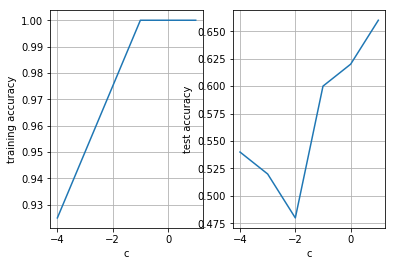

In [209]:
# Initialize an empty list to store values of training set accuracy.
acc_train_logreg2 = []

# Initialize an empty list to store values of test set accuracy.
acc_test_logreg2 = []

# Initialize an empty list to store different values of parameter 'c'.
c_logreg2 = []

for val in c:
    logreg2_model(val , X_transformed_train, Y_train, X_transformed_test, Y_test)
    
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.subplot(1, 2, 1)
plt.plot(np.log10(c_logreg2),acc_train_logreg2)
plt.grid()
plt.xlabel('c')
plt.ylabel('training accuracy')

plt.subplot(1, 2, 2)
plt.plot(np.log10(c_logreg2),acc_test_logreg2)
plt.grid()
plt.xlabel('c')
plt.ylabel('test accuracy')

Accuracy Training = 0.800000
Accuracy Test = 0.780000
Accuracy Training = 0.800000
Accuracy Test = 0.780000
Accuracy Training = 0.825000
Accuracy Test = 0.800000
Accuracy Training = 0.850000
Accuracy Test = 0.680000
Accuracy Training = 0.850000
Accuracy Test = 0.620000
Accuracy Training = 0.850000
Accuracy Test = 0.620000


Text(0,0.5,'test accuracy')

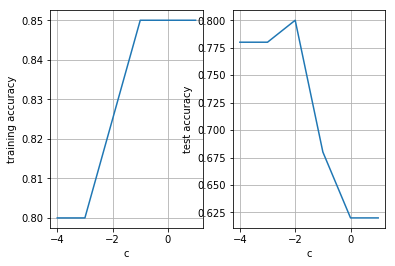

In [210]:
acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []

for val in c:
    svm_linear(val)
    
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.subplot(1, 2, 1)
plt.plot(np.log10(c_svm_linear),acc_train_svm_linear)
plt.grid()
plt.xlabel('c')
plt.ylabel('training accuracy')

plt.subplot(1, 2, 2)
plt.plot(np.log10(c_svm_linear),acc_test_svm_linear)
plt.grid()
plt.xlabel('c')
plt.ylabel('test accuracy')

In [211]:
# Call the above function i.e. svm_rbf with different values of parameter 'c' and 'g'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
for val in c:
    svm_rbf(val, 0.001)

Accuracy Training = 0.800000
Accuracy Test= 0.780000
Accuracy Training = 0.800000
Accuracy Test= 0.780000
Accuracy Training = 0.800000
Accuracy Test= 0.780000
Accuracy Training = 0.800000
Accuracy Test= 0.780000
Accuracy Training = 0.825000
Accuracy Test= 0.780000
Accuracy Training = 0.975000
Accuracy Test= 0.540000


Accuracy Training = 1.000000
Accuracy Test = 0.540000
Accuracy Training = 1.000000
Accuracy Test = 0.540000
Accuracy Training = 1.000000
Accuracy Test = 0.540000
Accuracy Training = 1.000000
Accuracy Test = 0.540000
Accuracy Training = 1.000000
Accuracy Test = 0.540000
Accuracy Training = 1.000000
Accuracy Test = 0.540000


Text(0,0.5,'test accuracy')

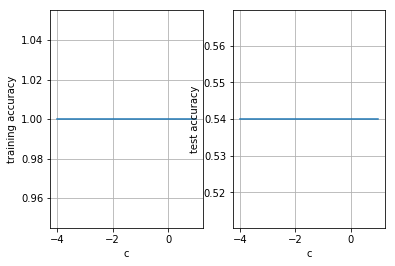

In [212]:
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []

for val in c:
    svm_polynomial(val)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.subplot(1, 2, 1)
plt.plot(np.log10(c_svm_poly),acc_train_svm_poly)
plt.grid()
plt.xlabel('c')
plt.ylabel('training accuracy')

plt.subplot(1, 2, 2)
plt.plot(np.log10(c_svm_poly),acc_test_svm_poly)
plt.grid()
plt.xlabel('c')
plt.ylabel('test accuracy')

In [102]:
c = 0.01
g = 0.5
xtr = np.array([1,2,3,4])
ytr = np.array([-1,1,1,-1])

xtr = xtr.reshape(-1, 1)


xnew = np.array([1.2, 2.5, 3.25])
xnew = xnew.reshape(-1, 1)

svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c, gamma = g)
    
# Fit the classifier on the training set.
svc_rbf.fit(xtr, ytr)
    
# Find the prediction and accuracy on the training set.
ynew = svc_rbf.predict(xnew)

print(ynew)

[-1  1  1]
